In [1]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import mode

from io import StringIO

In [2]:
orig_url = 'https://drive.google.com/file/d/1f0oO6ZXrEog-3dULKn_QUPfAliKUxsCo/view?usp=sharing'

file_id = orig_url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv = StringIO(url)
df = pd.read_csv(csv, sep=';')

In [3]:
# df = pd.read_csv('data/dataset_Facebook.csv', sep=';')

In [4]:
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [5]:
# Проверяем, в каких колонках есть NA и количество NA

df.isna().sum().sort_values(ascending=False)

share                                                                  4
like                                                                   1
Paid                                                                   1
Total Interactions                                                     0
Lifetime Post Total Reach                                              0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Lifetime Engaged Users                                                 0
Lifetime Post Total Impressions                                        0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                         

##### Несмотря на то, что NA немного, для чистоты эксперимента попробуем понять, на какие значения разумнее всего их заменить 

In [6]:
# смотрим на основные описательные характеристики share

df.share.describe()

count    496.000000
mean      27.266129
std       42.613292
min        0.000000
25%       10.000000
50%       19.000000
75%       32.250000
max      790.000000
Name: share, dtype: float64

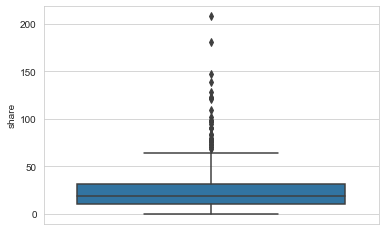

In [7]:
# построим график боксплот для значений share, которые не равны 
# максимальному выбросу (share = 790)

sns.set_style('whitegrid')
sns.boxplot(df.share[df.share != 790], orient='v') 

In [8]:
# заменим NA значения share на медиану

df.share.fillna(df.share.median(), inplace=True)

In [9]:
# смотрим на основные описательные характеристики like

df.like.describe()

count     499.000000
mean      177.945892
std       323.398742
min         0.000000
25%        56.500000
50%       101.000000
75%       187.500000
max      5172.000000
Name: like, dtype: float64

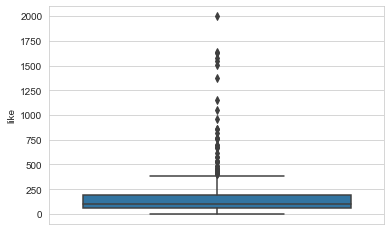

In [10]:
# построим график боксплот для значений like, которые не равны 
# максимальному выбросу (share = 5172)

sns.set_style('whitegrid')
sns.boxplot(df.like[df.like != 5172], orient='v') 

In [11]:
# заменим NA значения like на медиану

df.like.fillna(df.like.median(), inplace=True)

In [12]:
# смотрим на основные описательные характеристики Paid

df.Paid.describe()

count    499.000000
mean       0.278557
std        0.448739
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Paid, dtype: float64

In [13]:
# заменим NA значения Paid на среднее

df.Paid.fillna(df.Paid.mean(), inplace=True)

In [14]:
# Соберем все описательные характеристики в отдельный датафрейм df_desc

df_desc = pd.DataFrame(df.mean()).rename(columns={0: 'mean'})
df_desc['max'] = df.max()
df_desc['min'] = df.min()
df_desc['median'] = df.median()
df_desc['mode'] = df.drop('Type', axis=1).apply(lambda x: mode(x)[0]).transpose()

 #### Mean, max, min, median, mode для всех числовых значений массива

In [15]:
df_desc.round()

,mean,max,min,median,mode
Page total likes,123194.0,139441,81370,129600.0,136393.0
Category,2.0,3,1,2.0,1.0
Post Month,7.0,12,1,7.0,10.0
Post Weekday,4.0,7,1,4.0,7.0
Post Hour,8.0,23,1,9.0,3.0
Paid,0.0,1,0,0.0,0.0
Lifetime Post Total Reach,13903.0,180480,238,5281.0,677.0
Lifetime Post Total Impressions,29586.0,1110282,570,9051.0,4372.0
Lifetime Engaged Users,920.0,11452,9,626.0,537.0
Lifetime Post Consumers,799.0,11328,9,552.0,182.0


#### Описательные характеристики для каждого типа контента


In [16]:
df_gr_desc = df.groupby('Type') \
    .agg(['mean', 'max', 'min', 'median', lambda x: mode(x)[0]]) \
    .round().rename(columns={'<lambda_0>': 'mode'})

In [17]:
df_gr_desc

Page total likes                                 Category          \
                   mean     max     min  median    mode     mean max min   
Type                                                                       
Link           116363.0  138895   85979  115396  138353      1.0   3   1   
Photo          122354.0  139441   81370  128032  124940      2.0   3   1   
Status         132647.0  139441  104070  135713  139441      2.0   3   1   
Video          135015.0  138895  126424  137893  137893      1.0   1   1   

                    ... share                           Total Interactions  \
       median mode  ...  mean    max   min median  mode               mean   
Type                ...                                                      
Link        1    1  ...  13.0   44.0   0.0   10.0   2.0               89.0   
Photo       2    1  ...  27.0  790.0   0.0   19.0  14.0              217.0   
Status      2    2  ...  31.0  123.0   1.0   28.0   1.0              217.0   
Video       1    1  ...  52.0  121.0  13.0   44.0  13.0              296.0   

                              
         max min median mode  
Type                          
Link     420   6   52.0   14  
Photo   6334   0  122.0    0  
Status  1009  17  186.0  117  
Video    550  81  271.0   81  

[4 rows x 90 columns]

#### Найти самый популярный объект в выборке

Объект с индексом 244: наибольшее количество лайков, репостов, комментариев.
Значительной корреляции количества лайков, репостов, комментариев с временем и месяцем поста нет. 

In [18]:
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [19]:
df[df.like == df.like.max()]

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
244,130791,Photo,2,7,3,5,1.0,180480,319133,8072,4010,6242,108752,51456,3316,372,5172.0,790.0,6334


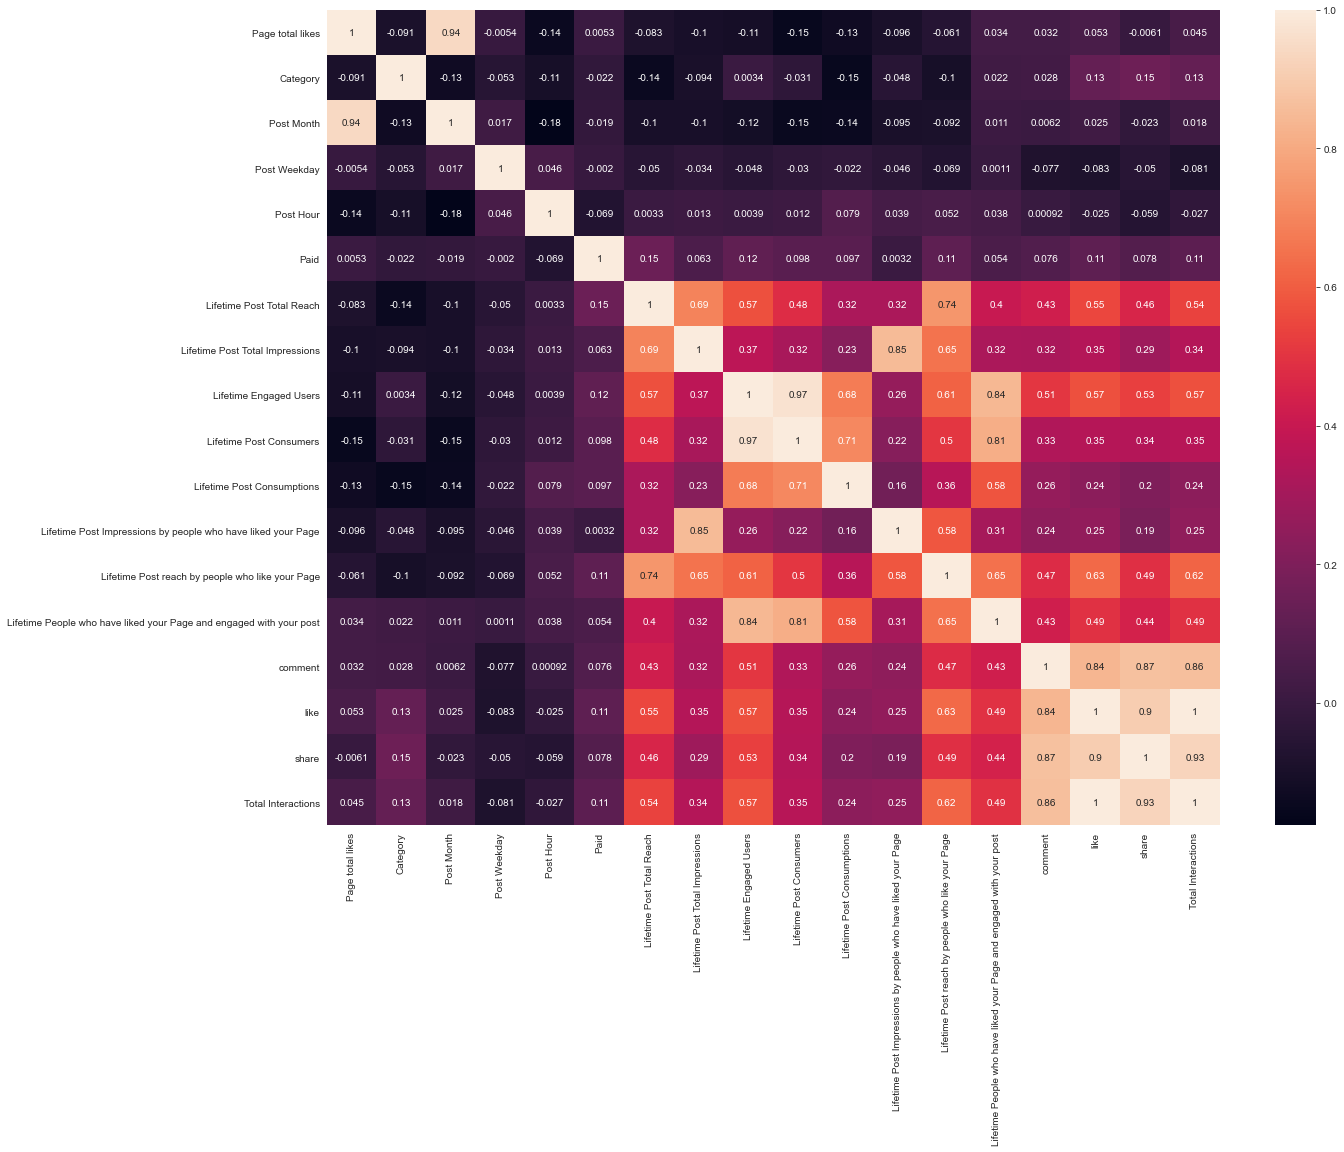

In [20]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)